In [35]:
import numpy as np
import pandas as pd
from Functions import *

In [36]:
filename_ADrange = "./results/AD_range.txt"

In [37]:
data_arr = []
with open(filename_ADrange,'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        line_strip = line.strip()
        gapx = float(line_strip.split(",")[0])
        gapy = float(line_strip.split(",")[1])
        iso_zero = float(line_strip.split(",")[2])   # zero dispersion pt of isolated ring
        left_zero = float(line_strip.split(",")[3])  # left zero dispersion pt of coupled ring
        right_zero = float(line_strip.split(",")[4]) # right zero dispersion pt of coupled ring
        data_arr.append([gapx,iso_zero,left_zero,right_zero])
data_arr = (np.array(data_arr),)
data_arr


(array([[   2.6     , 1517.267206, 1502.020202, 1556.902429],
        [   2.7     , 1517.267307, 1502.020202, 1557.634854],
        [   2.8     , 1517.267409, 1530.702813, 1558.005299],
        [   2.9     , 1517.267511, 1532.19064 , 1558.219524],
        [   3.      , 1517.267613, 1533.792671, 1558.27716 ]]),)

In [38]:
filename_D_iso = "./results/Dispersion_isolated_WG.csv"
filename_D_coupled = "./results/Dispersion_coupled_WG.csv"

In [39]:
df_iso = pd.read_csv(filename_D_iso)

In [40]:
fold_num = 10
Y_data = ()
gap_arr = []
data_arr = []

df_coupled = pd.read_csv(filename_D_coupled)
# df_coupled = pd.read_csv(filename_D_iso)
# wavl_arr = np.linspace(1500,1600,100)[2:-2]
wavl_arr        = df_coupled["wavl"]
num_of_wavl_pts = len(wavl_arr)
xticks_ori      = np.arange(0,num_of_wavl_pts,int(num_of_wavl_pts/fold_num))
wavl_arr_ori    = wavl_arr[xticks_ori]
wavl_arr_ticks  = ["{:.3f}".format(wavl) for wavl in wavl_arr_ori]

for column in df_coupled.columns[1:]:
    column_data = column.replace("(","").replace(")","")
    gapx = float(column_data.split(",")[0])
    gapy = float(column_data.split(",")[1])
    gap = np.sqrt(gapx**2 + gapy**2)
    # print("gap:{:.2f}".format(gap))
    gap_arr.append(gap)
    data_arr.append(df_coupled[column])
np.sort(data_arr,axis = 1)
data_arr_zero_loc_list = []
data_arr = np.array(data_arr)
for i in range(np.shape(data_arr)[0]):
    line = data_arr[i,:]
    for j in range(len(line)-1):
        if line[j] * line[j+1] < 0:
            data_arr_zero_loc_list.append([j,i])

# data_arr_neg_mask = np.where(data_arr<0)
# data_arr[data_arr_neg_mask] = -np.log10(-data_arr[data_arr_neg_mask])
# data_arr_neg_mask = np.where(data_arr>0)
# data_arr[data_arr_neg_mask] = np.log10(data_arr[data_arr_neg_mask])
np.shape(data_arr)
data_arr_zero_loc_list = np.array(data_arr_zero_loc_list)
data_arr_zero_loc_list

array([[30,  0],
       [54,  0],
       [31,  1],
       [55,  1],
       [32,  2],
       [56,  2],
       [32,  3],
       [56,  3],
       [34,  4],
       [56,  4],
       [33,  5],
       [56,  5],
       [37,  6],
       [56,  6],
       [38,  7],
       [56,  7],
       [38,  8],
       [55,  8],
       [39,  9],
       [55,  9],
       [39, 10],
       [55, 10]])

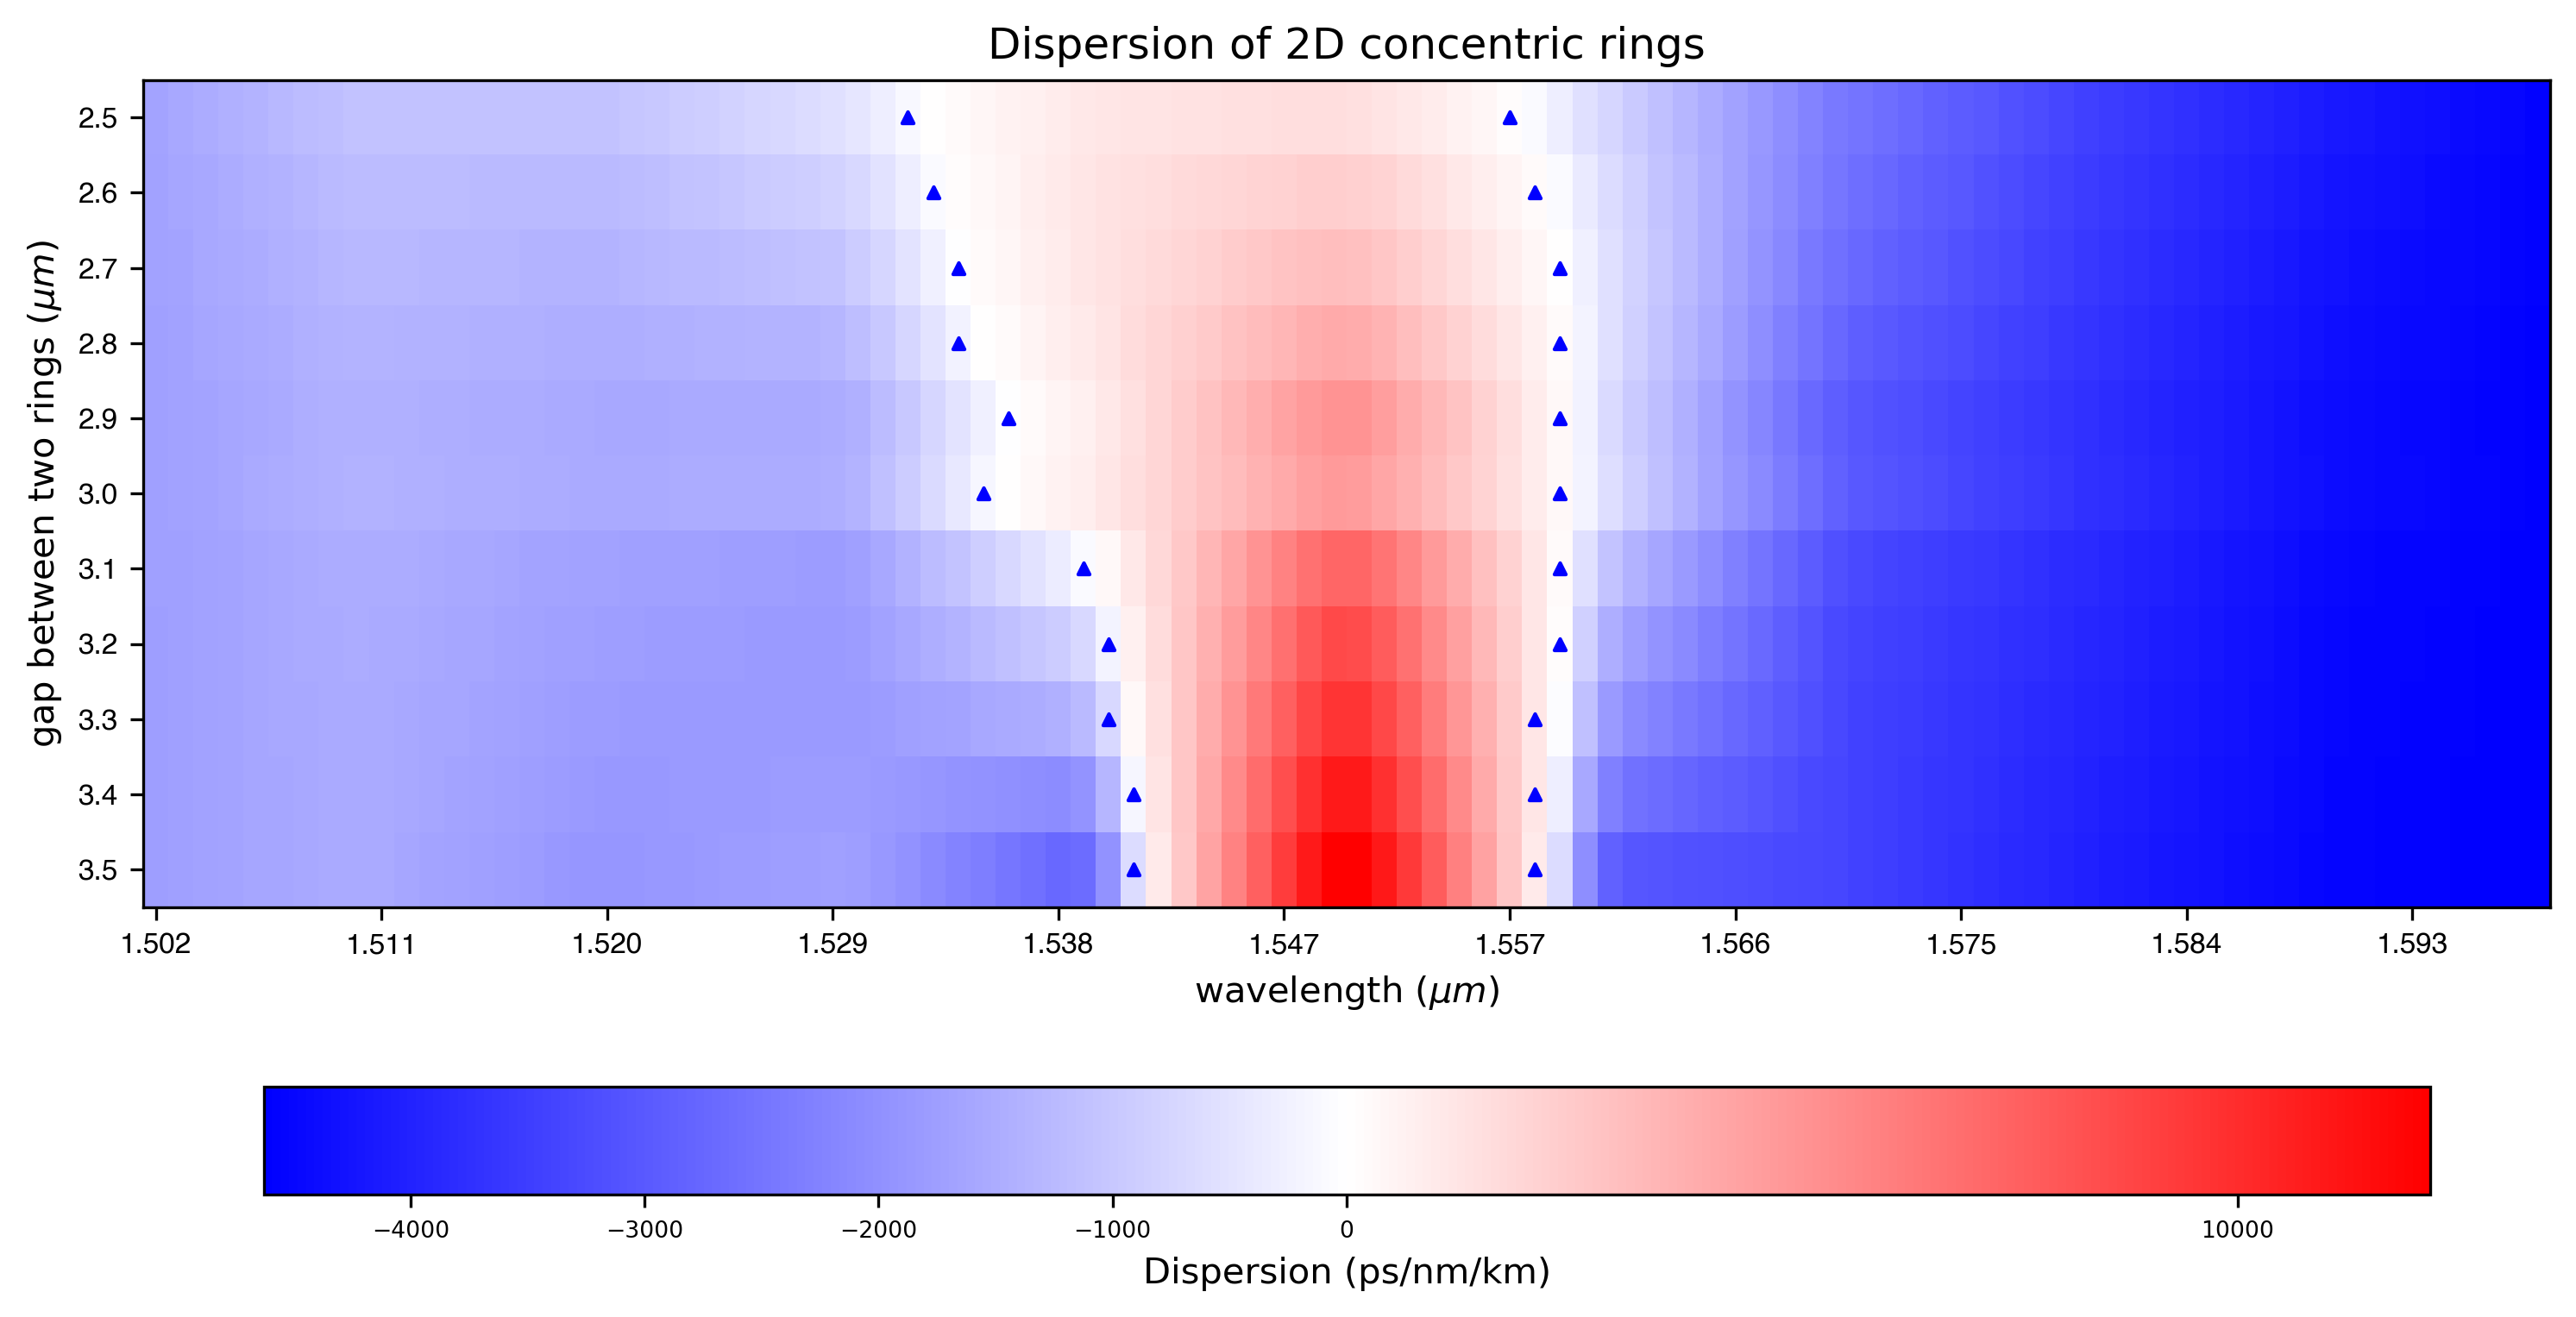

In [41]:
from matplotlib.colors import TwoSlopeNorm
fonttype = "Helvetica"
fontsize = 8
colormap = "bwr"
# colormap = "berlin"
figsize  = (12,9)
cbar_num_of_pts = 6
norm    = TwoSlopeNorm(vmin=np.min(data_arr), vcenter=0, vmax=np.max(data_arr))

fig, ax = plt.subplots(figsize=figsize,dpi=300)
im      = ax.imshow(data_arr,cmap= colormap, norm=norm, aspect=3)
# ax.plot(np.arange(0,num_of_wavl_pts,1),1*np.ones(num_of_wavl_pts))
ax.scatter(data_arr_zero_loc_list[:,0],data_arr_zero_loc_list[:,1], s=10, c='b', marker='^',)
cbar = fig.colorbar(im, ax=ax, orientation='horizontal',
                    shrink=0.9, pad=0.1)  # shrink: 缩放比例，pad: 间距
cbar.set_ticks(ticks_arr(data_arr))
cbar.ax.tick_params(labelsize=fontsize*0.8)
# cbar.set_label(r"sgn(D) $\log_{10}$($|D|$)")
cbar.set_label(r"Dispersion (ps/nm/km)")

plt.xticks(xticks_ori,wavl_arr_ticks,fontproperties = fonttype, size = fontsize)
plt.yticks(np.arange(0,len(gap_arr),1),gap_arr,fontproperties = fonttype, size = fontsize)
plt.xlabel(r"wavelength ($\mu m$)")
plt.ylabel(r"gap between two rings ($\mu m$)")
title = "Dispersion of 2D concentric rings"
plt.title(title)
plt.savefig("./results/"+title+".jpg")
plt.show()

In [42]:
np.linspace(2.5,3.5,21)

array([2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  ,
       3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 ])